### Import Necessary Packages

In [1]:
import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt
import random

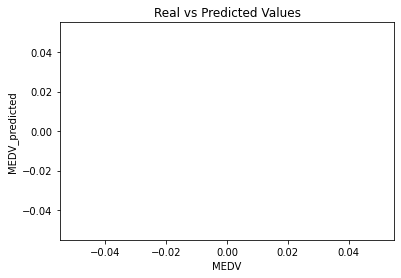

In [218]:
from sklearn.neural_network import MLPRegressor


hidden_layer_sizes = (20, 20)
alpha = 1.e-4

#solver: lbfgs para problemas pequeños, adam para problemas grandes
mlp_m =  MLPRegressor(hidden_layer_sizes=(16,), 
                      activation='logistic', 
                      solver='sgd', 
                      alpha=alpha,
                      early_stopping=True,
                      tol=1.e-8, 
                      max_iter=10000)

mlp_m.fit(np.array([train_X]).T, train_Y)

y_pred = mlp_m.predict(np.array([train_X]).T)

plt.title('Real vs Predicted Values')
plt.xlabel('MEDV')
plt.ylabel('MEDV_predicted')
_ = plt.plot()

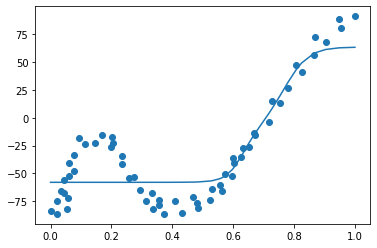

In [219]:
p = np.argsort(train_X_normalized)
x = train_X_normalized[p]
l = y_pred[p]
y = train_Y[p]
plt.scatter(x, y)
plt.plot(x, l)

In [208]:
l

array([-1.31979467, -1.31986301, -1.31986301, -1.31989328, -1.31992348,
       -1.31993102, -1.31995361, -1.31996113, -1.31997617, -1.31997617,
       -1.32002117, -1.32002866, -1.32007348, -1.32013302, -1.3202292 ,
       -1.32029537, -1.32037579, -1.32038308, -1.32039764, -1.32048464,
       -1.32048464, -1.32054231, -1.32059256, -1.32064973, -1.32069953,
       -1.32075621, -1.32076327, -1.32082667, -1.32082667, -1.32086875,
       -1.32096635, -1.32102866, -1.32113176, -1.32116592, -1.32117274,
       -1.32128129, -1.32129478, -1.321362  , -1.32138208, -1.3214088 ,
       -1.32146868, -1.32147531, -1.32148856, -1.32154799, -1.32156115,
       -1.32161363, -1.32165281, -1.32166584, -1.32178234, -1.32180805,
       -1.32187203, -1.32194192, -1.32200503, -1.32204896, -1.32214861,
       -1.32215481, -1.32224108, -1.32234475, -1.32236293, -1.32247118])

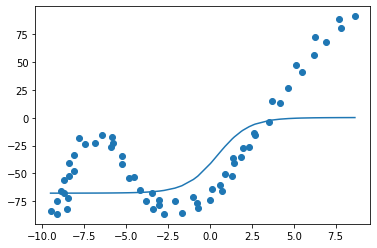

In [26]:
p = np.argsort(train_X_normalized)
x = train_X_normalized[p]
l = y_pred[p]
y = train_Y[p]
plt.scatter(x, y)
plt.plot(x, l)

In [27]:
l

array([-6.77801861e+01, -6.77732176e+01, -6.77732176e+01, -6.77697643e+01,
       -6.77660485e+01, -6.77650743e+01, -6.77620325e+01, -6.77609765e+01,
       -6.77587971e+01, -6.77587971e+01, -6.77516568e+01, -6.77503690e+01,
       -6.77419543e+01, -6.77285094e+01, -6.76988802e+01, -6.76698767e+01,
       -6.76194497e+01, -6.76137687e+01, -6.76017381e+01, -6.75059329e+01,
       -6.75059329e+01, -6.74105386e+01, -6.72961431e+01, -6.71151665e+01,
       -6.68952350e+01, -6.65438653e+01, -6.64904320e+01, -6.58847486e+01,
       -6.58847486e+01, -6.53223210e+01, -6.32601908e+01, -6.11230656e+01,
       -5.54378286e+01, -5.28165584e+01, -5.22453832e+01, -4.11522262e+01,
       -3.95595769e+01, -3.13468389e+01, -2.88977811e+01, -2.57194393e+01,
       -1.91758395e+01, -1.85145561e+01, -1.72362249e+01, -1.22430834e+01,
       -1.13025939e+01, -8.11626725e+00, -6.26940096e+00, -5.74377398e+00,
       -2.54923789e+00, -2.11841056e+00, -1.32462254e+00, -7.78836400e-01,
       -4.69492995e-01, -

# Linear Regression without Normalization

In [2]:
# Load datasets
train_data = pd.read_csv('data_supervised_learning/train1', delimiter="\t", header=None)
test_data = pd.read_csv('data_supervised_learning/test1', delimiter="\t", header=None)
train_X = train_data[0].values
train_Y = train_data[1].values
test_X = test_data[0].values
test_Y = test_data[1].values

In [95]:
def linear_regression(learning_rate, features, labels, epoch, epsilon=1e-9):
    num_samples = features.shape[0]
    np.random.seed(42)
    W = np.random.normal(0, 0.1, 2)

    for i in range(epoch):
        #print("epoch is", i)

        for j in range(0, num_samples):

            # Get sample from data
            train_X_sample = features[j]
            train_Y_sample = labels[j]
            #print("\nSample is ", train_X_sample, train_Y_sample)

            # Calculate prediction for current weights
            prediction = W[0] + W[1] * train_X_sample
            #print("Prediction is", prediction)

            # Calculate difference of ground label and prediction
            difference = train_Y_sample - prediction
            #print("Difference is", difference)

            # Calculate differentials
            d_w1 = 2 * difference * (-1 * train_X_sample)
            d_w0 = 2 * difference * -1
            #print("Gradients are", w1_gra, w0_gra)

            W[0] -= learning_rate * d_w0
            W[1] -= learning_rate * d_w1
            #print("Updated weights are", W[1], W[0])

    return W

In [61]:
def plot_regression(features, labels, predictions, label_addition=""):

    plt.plot(features, predictions, label="predicted")
    plt.scatter(features, labels, s=20, color="r", label="actual")
    plt.legend(loc="upper left")
    plt.title('feature vs. label' + label_addition)
    plt.xlabel('feature')
    plt.ylabel('label')
    plt.show()

In [62]:
def plot_regressionv2(features, labels, generated_features, predictions, label_addition=""):

    plt.plot(generated_features, predictions, label="predicted")
    plt.scatter(features, labels, s=20, color="r", label="actual")
    plt.legend(loc="upper left")
    plt.title('feature vs. label' + label_addition)
    plt.xlabel('feature')
    plt.ylabel('label')
    plt.show()

## Results on training data

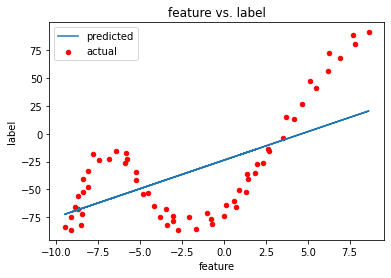

Mean Squared Error is 1232.9685190442206


In [97]:
W = linear_regression(1e-3, train_X, train_Y, 5000)
predictions = W[1] * train_X  + W[0]
plot_regression(train_X, train_Y, predictions)
error = sum(pow(train_Y - predictions, 2)) / train_Y.shape[0]
print("Mean Squared Error is", error)

In [98]:
W

array([-23.81412449,   5.11638386])

## Results on Test Data

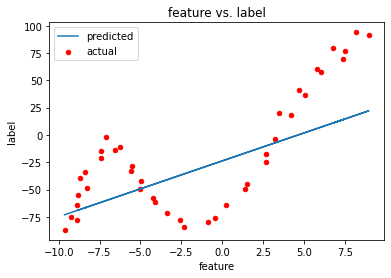

Mean Squared Error is 1487.9688814853691


In [99]:
predictions = W[1] * test_X  + W[0]
plot_regression(test_X, test_Y, predictions)
error = sum(pow(test_Y - predictions, 2)) / test_Y.shape[0]
print("Mean Squared Error is", error)

# Linear Regression with Normalization

In [100]:
# Normalize data
train_X_normalized = (train_X - np.min(train_X)) / (np.max(train_X) - np.min(train_X))
test_X_normalized = (test_X - np.min(test_X)) / (np.max(test_X) - np.min(test_X))

In [101]:
test_X_normalized

array([0.04207921, 0.04207921, 0.07425743, 0.06683168, 0.12128713,
       0.13613861, 0.16584158, 0.22029703, 0.25247525, 0.2970297 ,
       0.37871287, 0.4950495 , 0.59158416, 0.66336634, 0.70544554,
       0.78960396, 0.82920792, 0.92079208, 0.88366337, 0.95792079,
       1.        , 0.91336634, 0.84405941, 0.76980198, 0.7450495 ,
       0.69306931, 0.66336634, 0.5990099 , 0.52970297, 0.47277228,
       0.39356436, 0.33663366, 0.29207921, 0.24752475, 0.21782178,
       0.18316832, 0.11881188, 0.0519802 , 0.04455446, 0.01980198,
       0.        ])

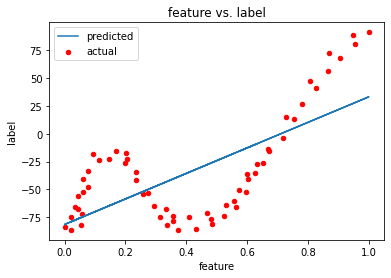

Mean Squared Error is 71397.3757010889


In [192]:
W_normalized = linear_regression(1e-3, train_X_normalized, train_Y, 5000)
predictions_normalized = W_normalized[1] * train_X_normalized  + W_normalized[0]
plot_regression(train_X_normalized, train_Y, predictions_normalized)
error = sum(pow(train_Y - predictions_normalized, 2))
print("Mean Squared Error is", error)

## Results on test data

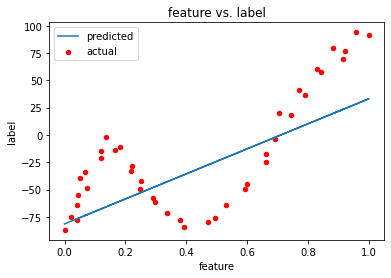

Mean Squared Error is 1399.6520495097213


In [103]:
predictions = W_normalized[1] * test_X_normalized  + W_normalized[0]
plot_regression(test_X_normalized, test_Y, predictions)
error = sum(pow(test_Y - predictions, 2)) / test_Y.shape[0]
print("Mean Squared Error is", error)

# Neural Network with 1 Hidden Layer

In [230]:
import math

In [220]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_backward(x):
    return x * (1 - x)

In [251]:
def initialize_weights(num_samples, num_hidden_units, num_outputs):
    weights = dict()

    W1 = np.random.random((num_hidden_units, num_samples))

    b1 = np.random.random((num_hidden_units, 1))

    W2 = np.random.random((num_outputs, num_hidden_units))

    b2 = np.random.random((num_outputs, 1))

    weights['W1'] = W1
    weights['b1'] = b1

    weights['W2'] = W2
    weights['b2'] = b2

    return weights

In [222]:
weights = initialize_weights(1, 2, 1)

In [223]:
((np.array([train_Y]))).shape

(1, 60)

In [224]:
(np.dot(weights['W1'], (np.array([train_X])[:,0]).reshape(1,1)) + weights['b1']).shape

(2, 1)

In [225]:
def forward_propogation(features, weights):

    values = dict()

    Z1 = np.dot(weights['W1'], features) + weights['b1']
    A1 = sigmoid(Z1)

    Z2 = np.dot(weights['W2'], A1) + weights['b2']
    A2 = Z2

    values['Z1'] = Z1
    values['A1'] = A1

    values['Z2'] = Z2
    values['A2'] = A2

    return values

In [226]:
def calculate_loss(weights, labels):
    predictions = weights['A2']
    loss = np.sum(np.square(predictions - labels))
    #print('Loss is', loss)
    return loss


In [330]:
def backward_propogation(weights, values, features, labels):

    gradients = dict()

    dA_2 = (values['A2'] - labels)
    dZ_2 = dA_2

    gradients['W2'] = np.dot(dZ_2, values['A1'].T)
    gradients['b2'] = np.sum(dZ_2, axis=1, keepdims=True)

    dA_1 = np.dot(weights['W2'].T, dZ_2)
    dZ_1 = np.multiply(dA_1, sigmoid_backward(values['A1']))

    gradients['W1'] = np.dot(dZ_1, features.T)
    gradients['b1'] = np.sum(dZ_1, axis=1, keepdims=True)

    return gradients

In [228]:
np.random.random()

0.9507143064099162

In [283]:
def update_weights(weights, gradients, learning_rate):

    updated_weights = dict()

    W1 = weights['W1'] - learning_rate * gradients['W1']
    b1 = weights['b1'] - learning_rate * gradients['b1']

    W2 = weights['W2'] - learning_rate * gradients['W2']
    b2 = weights['b2'] - learning_rate * gradients['b2']

    updated_weights['W1'] = W1
    updated_weights['b1'] = b1

    updated_weights['W2'] = W2
    updated_weights['b2'] = b2
    
    return updated_weights


In [327]:
(np.array([train_X])).shape[1]

60

In [331]:
def ann_regressionv2(features, labels, learning_rate, epoch, num_hidden_units):

    num_features = 1
    num_samples = features.shape[1]
    num_outputs = 1

    # Initialize weights
    weights = initialize_weights(num_features, num_hidden_units, num_outputs)
    #print(weights)

    for i in range(epoch):

        for j in range(num_samples):

            train_X_sample = (features[:,j]).reshape((1,1))
            train_Y_sample = (labels[:,j]).reshape((1,1))

            values = forward_propogation(train_X_sample, weights)
            loss = calculate_loss(values, train_Y_sample)
            gradients = backward_propogation(weights, values, train_X_sample, train_Y_sample)
            weights = update_weights(weights, gradients, learning_rate)

        values = forward_propogation(features, weights)
        loss = calculate_loss(values, labels)
        print('Cost at iteration', (i + 1), "=", loss)

    return weights


In [279]:
np.array([train_X])[:,59]

array([0.5875576])

In [333]:
weigths = ann_regressionv2(np.array([train_X]), np.array([train_Y]), 1e-3, 10000, 16)

42 = 19751.925519705368
Cost at iteration 9543 = 19751.912112835096
Cost at iteration 9544 = 19751.898708163775
Cost at iteration 9545 = 19751.885305690506
Cost at iteration 9546 = 19751.87190541439
Cost at iteration 9547 = 19751.85850733453
Cost at iteration 9548 = 19751.845111450024
Cost at iteration 9549 = 19751.83171775997
Cost at iteration 9550 = 19751.818326263496
Cost at iteration 9551 = 19751.804936959685
Cost at iteration 9552 = 19751.79154984763
Cost at iteration 9553 = 19751.778164926454
Cost at iteration 9554 = 19751.76478219526
Cost at iteration 9555 = 19751.751401653142
Cost at iteration 9556 = 19751.73802329922
Cost at iteration 9557 = 19751.724647132593
Cost at iteration 9558 = 19751.711273152367
Cost at iteration 9559 = 19751.697901357642
Cost at iteration 9560 = 19751.684531747527
Cost at iteration 9561 = 19751.671164321146
Cost at iteration 9562 = 19751.657799077588
Cost at iteration 9563 = 19751.644436015966
Cost at iteration 9564 = 19751.631075135396
Cost at iterat

In [319]:
np.sum(weigths['b2'], axis=1, keepdims=True)

array([[-0.31567039]])

In [273]:
weigths

{'W1': array([[ 0.77158629],
        [ 0.86386844],
        [-0.89889816],
        [-0.94671902],
        [ 0.85128651],
        [ 0.77242716],
        [ 0.84544415],
        [-0.94000468],
        [ 0.85265761],
        [-0.73692056],
        [ 0.67365048],
        [-0.96467668],
        [ 0.87798138],
        [ 0.8481287 ],
        [ 0.76632297],
        [ 0.67437335]]),
 'b1': array([[0.08033165],
        [0.05299247],
        [1.10942761],
        [0.46211375],
        [0.76302554],
        [0.22550745],
        [0.61516129],
        [0.87627379],
        [0.56901154],
        [0.58439981],
        [0.40167439],
        [0.47197678],
        [0.88587157],
        [0.79590609],
        [0.88642292],
        [0.08713834]]),
 'W2': array([[  0.65095993,   0.92720261, -16.00139681, -14.38946458,
           0.67413258,   0.52104693,   0.75447201, -17.16460607,
           0.76095408,  -5.91267551,   0.07981566, -15.68856105,
           0.75860174,   0.61046526,   0.25427962,   0.23096506

In [275]:
weigths['W1'] * np.array([train_X])[:,0]

array([[-7.01361271],
       [-7.85244469],
       [ 8.17086   ],
       [ 8.60554497],
       [-7.7380767 ],
       [-7.02125607],
       [-7.68497048],
       [ 8.54451255],
       [-7.75053983],
       [ 6.69850598],
       [-6.12338977],
       [ 8.76877768],
       [-7.98072941],
       [-7.70937266],
       [-6.96576985],
       [-6.12996051]])

In [322]:
def ann_regression(features, labels, learning_rate, epoch, num_hidden_units):

    num_features = 1
    num_samples = features.shape[0]
    num_outputs = 1

    # Initialize weights
    weights = initialize_weights(num_features, num_hidden_units, num_outputs)
    #print(weights)

    for i in range(epoch):

        values = forward_propogation(features, weights)
        loss = calculate_loss(values, labels)
        gradients = backward_propogation(weights, values, features, labels)
        weights = update_weights(weights, gradients, learning_rate)
        print('Cost at iteration', (i + 1), "=", loss)

        break

    return weights


In [103]:
(np.array([train_Y])).shape

(1, 60)

In [323]:
weigths = ann_regression(np.array([train_X]), np.array([train_Y]), 1e-3, 10000, 16)

[[ 4.44311715e-01  3.84180431e-01  3.30096910e-01  3.74848848e-01
   1.07812224e+00  4.07485553e+00  9.47146517e+00  2.08951908e+01
   7.91996275e+00  1.53439366e+00 -2.04630984e-01 -5.48409882e-01
  -4.41511495e-01 -2.16555375e-01 -1.17372625e-01 -1.77271714e-01
  -2.69995692e-01 -3.41537041e-01 -3.76547888e-01 -3.32903450e-01
  -1.04146223e-01  4.87240449e-01  1.49446867e+00  2.75655643e+00
   4.38266258e+00  6.06164149e+00  9.11421386e+00  5.70839088e+00
   3.39204765e+00  1.24387295e+01  1.68979385e+01  1.98390590e+01
   2.15184056e+01  1.71201937e+01  1.41191245e+01  1.24778663e+01
   1.01894556e+01  7.02758545e+00  4.77029805e+00  2.57068208e+00
   2.12160059e+00  1.02459108e+00  5.25983680e-01  4.84327209e-01
   2.32597787e-01  3.44236572e-01  4.68549967e-01  3.69312836e-01
   4.58766259e-01  3.26636886e-01  6.04966826e-01  3.84846650e-01
   5.48632501e-01  4.28373408e-01  7.32764991e-01  1.34043783e+01
   1.77083125e+01  1.87775076e+01  1.45868122e+01  1.21073017e+01]
 [ 1.0897

In [270]:
weights

{'W1': array([[0.37454012],
        [0.95071431]]),
 'b1': array([[0.37454012],
        [0.95071431]]),
 'W2': array([[0.37454012, 0.95071431]]),
 'b2': array([[0.37454012]])}

In [334]:
lele = forward_propogation(np.array([train_X]), weigths)

In [117]:
plot_regression(train_X, train_Y, aq['A2'][0])

ValueError: x and y must have same first dimension, but have shapes (60,) and (200,)

In [335]:
train_X_p = train_X[permutation]
train_Y_p = train_Y[permutation]
lele_p = (lele['A2'][0])[permutation]

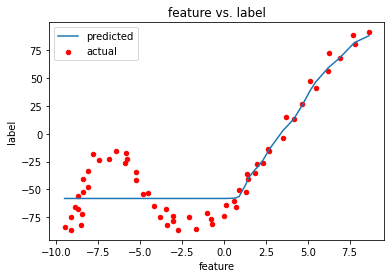

In [336]:
plot_regression(train_X_p, train_Y_p, lele_p)

In [329]:
per = np.argsort(test_X)
test_X_p = test_X[per]
test_Y_p = test_Y[per]
pp = forward_propogation(np.array([test_X]), weigths)
lp = (pp['A2'][0])[per]

<ipython-input-298-bea5def2f1a9>:2: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))


In [332]:
pp['A2']

array([[-54.16631457, -54.16631457, -54.16635306, -54.16634233,
        -54.16646093, -54.16651584, -54.16667421, -54.16725923,
        -54.16793968, -54.16970498, -54.1790791 , -54.24785692,
         17.25847679,  16.73402503,  16.28534506,  15.42961611,
         15.17162352,  14.89410408,  14.96709327,  14.85224612,
         14.82646164,  14.90569393,  15.10087238,  15.59913931,
         15.84527839,  16.42368083,  16.73402503,  17.2202144 ,
        -54.30588875, -54.22373924, -54.18252765, -54.1727783 ,
        -54.16944086, -54.16781074, -54.16722007, -54.16680833,
        -54.16645299, -54.16632437, -54.16631688, -54.1662975 ,
        -54.16628669]])

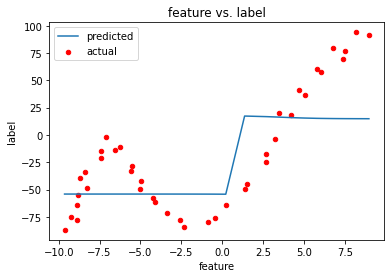

In [330]:
plot_regression(test_X_p, test_Y_p, lp)

In [358]:
per = np.argsort(train_X_normalized)
test_X_p = train_X_normalized[per]
test_Y_p = train_Y[per]
pp = forward_propogation(np.array([train_X_normalized]), weigths)
lp = (pp['A2'][0])[per]

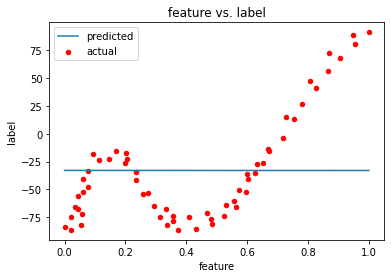

In [360]:
plot_regression(test_X_p, test_Y_p, lp)